# Universidade Federal do Rio Grande do Sul

## Redes Neurais — Backpropagation

## Trabalho 2 — INF01017

### Alunos: Dieu Merci Kengele, José Mário Reisswitz e Matheus Westhelle

Implementação e dificuldades
----------------------------
Nosso código implementa um Multilayer Perceptron que usa o algoritmo de de retropropagação pra treinamento. Além da
funcionalidade básica, nós usamos as técnicas de mini-batching e momentum para aceleração de convergência. Essas
técnicas foram de simples implementação e melhoraram bastante o tempo de convergência do algoritmo.

Os blocos de mais difícil implementação do código foram o algoritmo de backpropagation em si, especificamente com
formatos de matrizes, e a função de custo, pois tivemos um pouco de dificuldade em entender exatamente como implementar.

## Análise de corretude

### 1. Backpropagation

Para realizar a análise de corretude do algoritmo de backpropagation, criamos um script chamado `backpropagation_tester.py`, que pode ser usado da seguinte forma:

In [1]:
!python backpropagation_tester.py -h

usage: backpropagation_tester.py [-h] [--check-gradients]
                                 network_file weights_file dataset_file

This script tests the backpropagation implementation, given a neural net
specification file, an initial weights file, and a dataset. All arguments
are positional and should be given in this order. Run it as below:
    python3 backpropagation_tester.py <network> <weights> <dataset>

positional arguments:
  network_file       Neural network specification file
  weights_file       File containing initial weights
  dataset_file       Dataset to run backpropagation on

optional arguments:
  -h, --help         show this help message and exit
  --check-gradients


Ele gera uma saída formatada contendo os gradientes obtidos a partir do treinamento em um conjunto de dados especificado, bem como uma estrutura de rede e pesos iniciais. A seguir, rodamos o script utilizando as especificações do benchmark 1, dado na especificação do trabalho:

In [2]:
!python backpropagation_tester.py \
../benchmarks/network1.txt\
../benchmarks/initial_weights1.txt\
../benchmarks/dataset1.txt

Dataset loss: 0.8209757904998143
0.02735, 0.01333; 0.03318, 0.01618
0.23, 0.14037, 0.13756


Como visto pela saída obtida, os gradientes obtidos batem com o esperado do primeiro benchmark. Seguimos então com o teste do segundo benchmark:

In [3]:
!python backpropagation_tester.py \
../benchmarks/network2.txt\
../benchmarks/initial_weights2.txt\
../benchmarks/dataset2.txt

Dataset loss: 1.9035095157040507
0.00804, 0.02564, 0.04987; 0.00666, 0.01837, 0.06719; 0.00973, 0.03196, 0.05252; 0.00776, 0.05037, 0.08492
0.01071, 0.09068, 0.02512, 0.12597, 0.11586; 0.02442, 0.0678, 0.04164, 0.05308, 0.12677; 0.03056, 0.08924, 0.12094, 0.1027, 0.03078
0.08135, 0.17935, 0.12476, 0.13186; 0.20982, 0.19195, 0.30343, 0.25249


Os valores desse teste também se igualam aos esperados.

### 2. Verificação numérica de gradientes 

O mesmo script usado para gerar os gradientes obtidos pelo algoritmo de backpropagation pode ser usado para realizar a verificação numérica desses gradientes, a fim de garantir sua corretude; basta passar a flag `--check-gradients` para o script:

In [4]:
!python backpropagation_tester.py --check-gradients \
../benchmarks/network1.txt\
../benchmarks/initial_weights1.txt\
../benchmarks/dataset1.txt

Estimated gradients:
{1: array([[0.02735127, 0.01332868],
       [0.03317985, 0.01618029]]), 2: array([[0.2299962 , 0.14037216, 0.13755255]])}
Backpropagation gradients:
{2: array([[0.22999262, 0.14037099, 0.13755199]]), 1: array([[0.02735032, 0.0133283 ],
       [0.03317882, 0.01617989]])}
Gradients match!


In [5]:
!python backpropagation_tester.py --check-gradients \
../benchmarks/network2.txt\
../benchmarks/initial_weights2.txt\
../benchmarks/dataset2.txt

Estimated gradients:
{1: array([[0.00803632, 0.02564136, 0.04987447],
       [0.00665894, 0.018367  , 0.06719311],
       [0.00972758, 0.03195985, 0.05251862],
       [0.00775929, 0.05036916, 0.08492364]]), 2: array([[0.01071192, 0.09068409, 0.02511715, 0.12596776, 0.11586504],
       [0.02441803, 0.06780287, 0.04163792, 0.05307657, 0.12676545],
       [0.03056465, 0.08923518, 0.12094164, 0.10270219, 0.03078306]]), 3: array([[0.08135035, 0.17934954, 0.12475846, 0.13185907],
       [0.20981587, 0.19194173, 0.30342522, 0.25248752]])}
Backpropagation gradients:
{3: array([[0.08134536, 0.17934517, 0.1247551 , 0.13185691],
       [0.20981108, 0.19193749, 0.30342195, 0.25248539]]), 2: array([[0.01071117, 0.09068231, 0.02511529, 0.12596601, 0.11586317],
       [0.0244176 , 0.06780122, 0.04163615, 0.05307486, 0.12676359],
       [0.03056379, 0.08923327, 0.12093959, 0.10270025, 0.03078094]]), 1: array([[0.00803596, 0.02563986, 0.04987312],
       [0.00665868, 0.01836556, 0.06719178],
       [0.

Se observarmos de perto, vemos que os valores obtidos pela estimação numérica não são _exatamente_ iguais aos valores obtidos pelo algoritmo de backpropagation, mas o erro costuma ocorrer na quinta ou sexta casa decimal, o que é perfeitamente aceitável para fins práticos.

## Experimentos

Seguem os experimentos com os datasets indicados na especificação do trabalho, com diferentes hiperparâmetros.

Nos gráficos abaixo temos como eixo Y os valores da função de custo e no X cada época.

Dataset _house_votes84_ com diferentes arquiteturas de redes:

In [2]:
from mlp import MLP
from kfold_crossvalidation import KFoldCrossValidation

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('../datasets/house_votes_84_normalized.tsv', sep='\t')

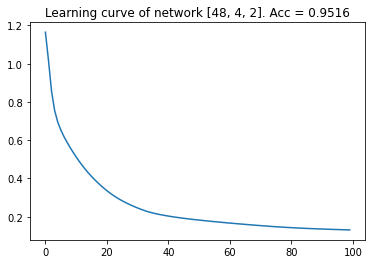

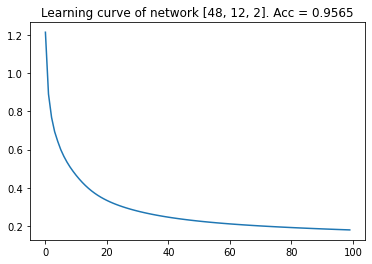

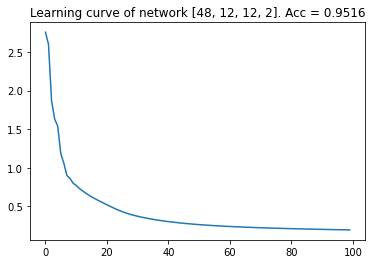

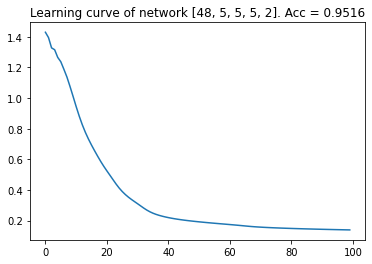

In [6]:
networks_architectures = [[48, 4, 2], [48, 12, 2], [48, 12, 12, 2], [48, 5, 5, 5, 2]]
for network in networks_architectures:
    model = MLP(dataset["target"].unique(), layers=network, lambda_=0.2, epochs=100, momentum_beta=0.85)
    kfold_xval = KFoldCrossValidation(model, delimiter="\t")
    acc = kfold_xval.kfold_cross_validation("../datasets/house_votes_84_normalized.tsv")
    ts = pd.Series(model.learning_curve)
    ts.plot(title=f'Learning curve of network {network}. Acc = {round(acc, 4)}')
    plt.show()

Podemos ver que a segunda arquitetura mais simples, uma hidden layer com 12 neurônios, obteve o melhor resultado de acurácia.

A seguir, testaremos o mesmo dataset com diferentes valores de momentum:

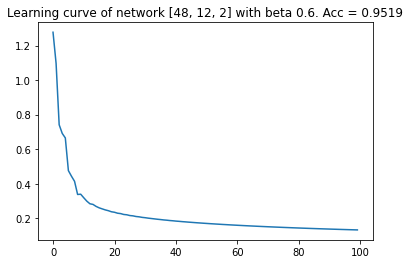

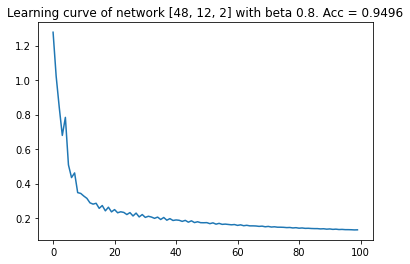

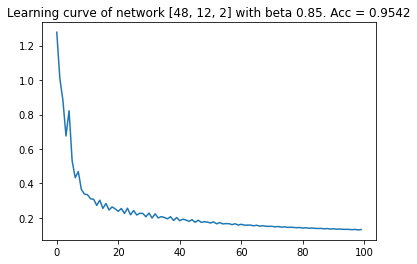

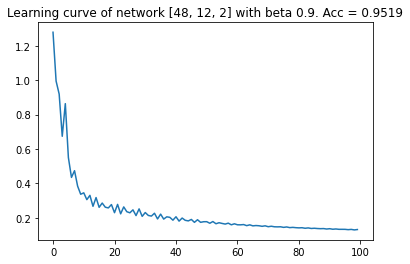

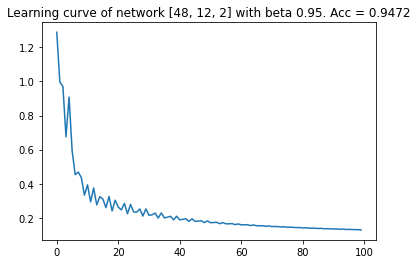

In [12]:
betas = [0.6, 0.8, 0.85, 0.9, 0.95]
for beta in betas:
    model = MLP(dataset["target"].unique(), layers=[48, 12, 2], lambda_=0.2, epochs=100, momentum_beta=beta)
    kfold_xval = KFoldCrossValidation(model, delimiter="\t")
    acc = kfold_xval.kfold_cross_validation("../datasets/house_votes_84_normalized.tsv")
    ts = pd.Series(model.learning_curve)
    ts.plot(title=f'Learning curve of network {[48, 12, 2]} with beta {beta}. Acc = {round(acc, 4)}')
    plt.show()

Observamos que a adição de momentum causa uma perturbação na forma da curva de aprendizado, além de tornar a convergência mais rápida: ou seja, os valores de custo da rede caem mais rápido. O melhor resultado em questão de acurácia foi com $\beta$ de 0.85.

Testaremos agora com diferentes valores do fator de reuglarização $\lambda$:

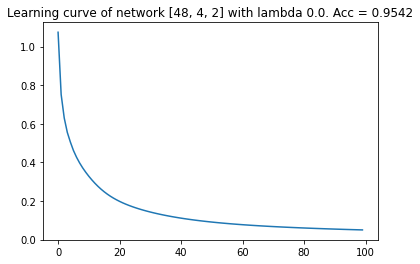

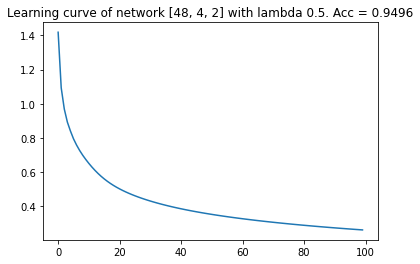

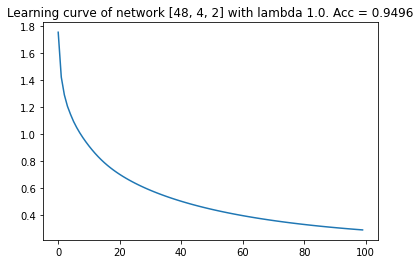

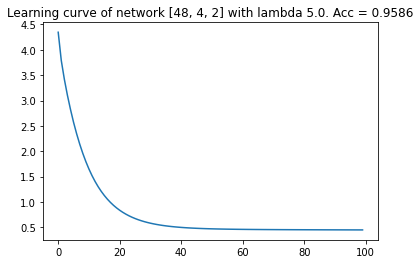

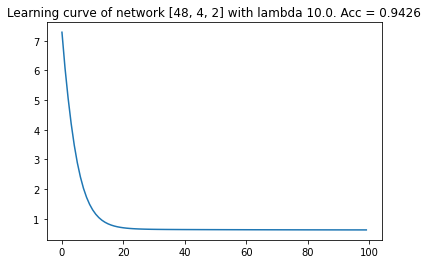

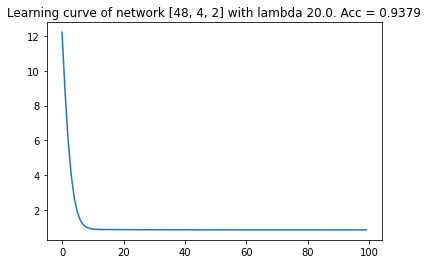

In [23]:
lambdas = [0.0, 0.5, 1.0, 5.0, 10.0, 20.0]
for lambda_ in lambdas:
    model = MLP(dataset["target"].unique(), layers=[48, 12, 2], lambda_=lambda_, epochs=100)
    kfold_xval = KFoldCrossValidation(model, delimiter="\t")
    acc = kfold_xval.kfold_cross_validation("../datasets/house_votes_84_normalized.tsv")
    ts = pd.Series(model.learning_curve)
    ts.plot(title=f'Learning curve of network {[48, 12, 2]} with lambda {lambda_}. Acc = {round(acc, 4)}')
    plt.show()

Podemos ver que entre os valores de $\lambda$ que testamos, 5.0 foi o melhor deles. Via de regra, também se observa que valores mais altos do fator de regularização causam uma convergência mais rápida, mas existe a aparência de que também se tende a cair em mínimos locais mais altos, i.e, o valor da função de custo para de mudar, mas em valores maiores.

Agora iremos executar os mesmos experimentos para o outro dataset, _wine_recognition_:

In [10]:
dataset = pd.read_csv('../datasets/wine_recognition_normalized.tsv', sep='\t')

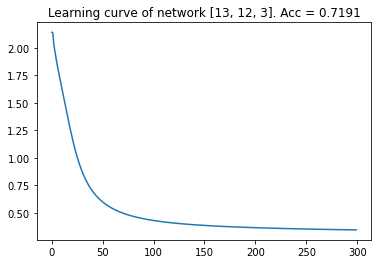

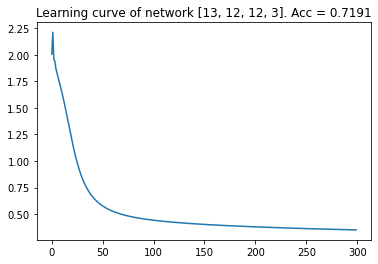

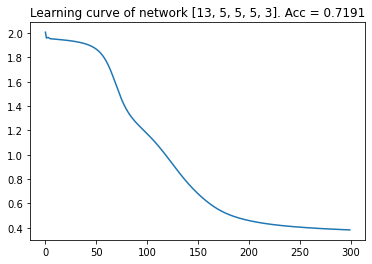

In [15]:
networks_architectures = [[13, 12, 3], [13, 12, 12, 3], [13, 5, 5, 5, 3]]
for network in networks_architectures:
    model = MLP(dataset["target"].unique(), layers=network, lambda_=0.2, epochs=300)
    kfold_xval = KFoldCrossValidation(model, delimiter="\t")
    acc = kfold_xval.kfold_cross_validation("../datasets/wine_recognition_normalized.tsv")
    ts = pd.Series(model.learning_curve)
    ts.plot(title=f'Learning curve of network {network}. Acc = {round(acc, 4)}')
    plt.show()

Todas as arquiteturas apresentam acurácia idêntica. Assim sendo, a arquitetura "ganhadora" é a mais simples, com apenas uma camada oculta.

Agora variando o valor de $\lambda$ para encontrar o melhor:

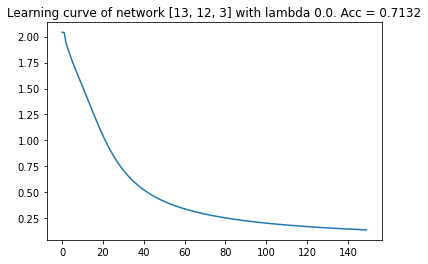

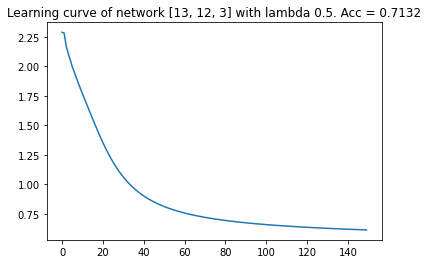

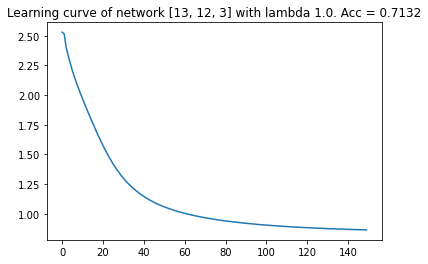

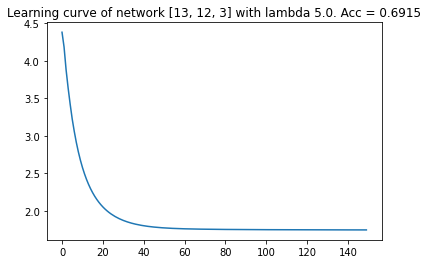

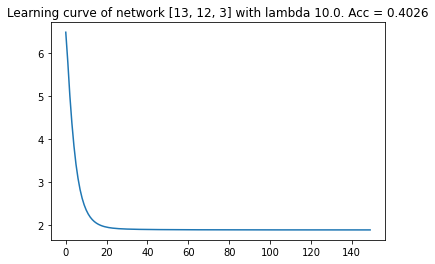

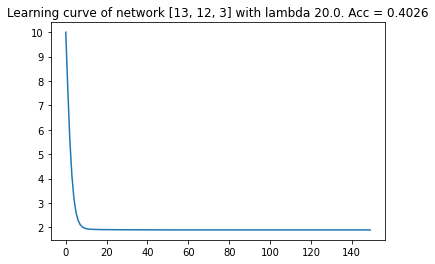

In [17]:
lambdas = [0.0, 0.5, 1.0, 5.0, 10.0, 20.0]
for lambda_ in lambdas:
    model = MLP(dataset["target"].unique(), layers=[13, 12, 3], lambda_=lambda_, epochs=150)
    kfold_xval = KFoldCrossValidation(model, delimiter="\t")
    acc = kfold_xval.kfold_cross_validation("../datasets/wine_recognition_normalized.tsv")
    ts = pd.Series(model.learning_curve)
    ts.plot(title=f'Learning curve of network {[13, 12, 3]} with lambda {lambda_}. Acc = {round(acc, 4)}')
    plt.show()

Para esse dataset, o melhor valor do fator de regularização $\lambda$, dentre os que testamos, é qualquer um menor ou igual a 1. Valores maiores apresentam convergência mais rápida, mas performance bem pior.

Por fim, testamos alguns diferentes valores de $\beta$ para momentum:

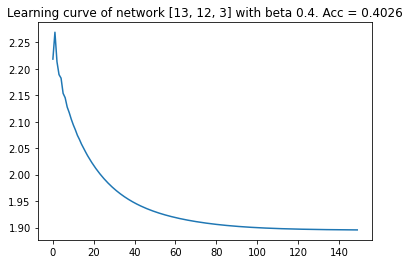

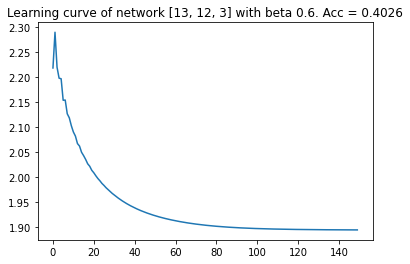

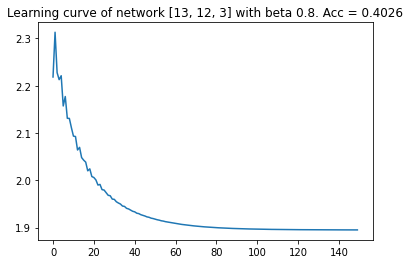

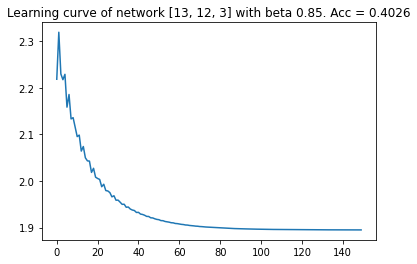

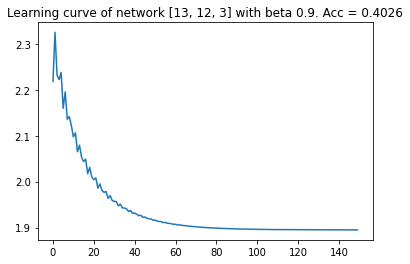

In [19]:
betas = [0.4, 0.6, 0.8, 0.85, 0.9]
for beta in betas:
    model = MLP(dataset["target"].unique(), layers=network, lambda_=1, epochs=150, momentum_beta=beta)
    kfold_xval = KFoldCrossValidation(model, delimiter="\t")
    acc = kfold_xval.kfold_cross_validation("../datasets/wine_recognition_normalized.tsv")
    ts = pd.Series(model.learning_curve)
    ts.plot(title=f'Learning curve of network {[13, 12, 3]} with beta {beta}. Acc = {round(acc, 4)}')
    plt.show()

Momentum não pareceu ajudar muito nossa rede nesse caso, mas o contrário: obtivemos uma acurácia menor, de 40.26%, independente do valor, mas com uma convergência mais rápida para os valores mais altos.